# Problem Statement
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/ag/Downloads/Company_Data.csv')

## EDA

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Skewness, kurtosis & correlation

In [6]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

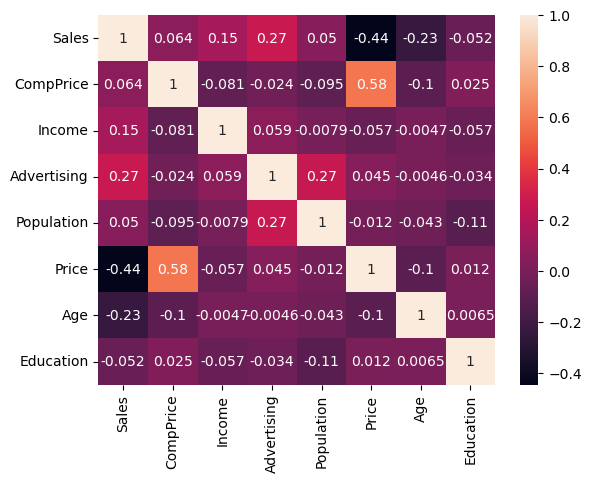

In [7]:
# plotting a correlation plot
sns.heatmap(df.corr(),annot=True)

#### When checked for correlation found that there is no correlation in the data

In [8]:
df.kurtosis()

/var/folders/09/9skqbfw93w33bh0d34nbxb240000gn/T/ipykernel_8477/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [9]:
df.skew()

/var/folders/09/9skqbfw93w33bh0d34nbxb240000gn/T/ipykernel_8477/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

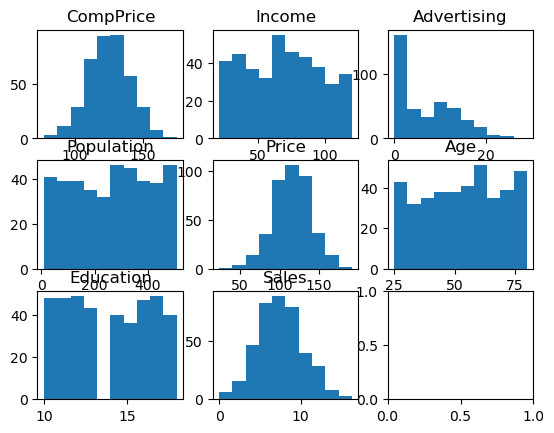

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots(3,3)
ax[0,0].hist('CompPrice', data=df)
ax[0,0].set_title('CompPrice')
ax[0,1].hist('Income', data=df)
ax[0,1].set_title('Income')
ax[0,2].hist('Advertising', data=df)
ax[0,2].set_title('Advertising')
ax[1,0].hist('Population', data=df)
ax[1,0].set_title('Population')
ax[1,1].hist('Price', data=df)
ax[1,1].set_title('Price')
ax[1,2].hist('Age', data=df)
ax[1,2].set_title('Age')
ax[2,0].hist('Education', data=df)
ax[2,0].set_title('Education')
ax[2,1].hist('Sales', data=df)
ax[2,1].set_title('Sales')
plt.show()
plt.tight_layout()

#### From graph CompPrice has a positive Kurtosis and Negative Skewness
#### From graph Income has a Negative Kurtosis and Positive Skewness
#### From graph Advertising has a Negative Kurtosis and Positive Skewness
#### From graph Population has a Negative Kurtosis and Negative Skewness
#### From graph Price has a positive Kurtosis and Negative Skewness
#### From graph Age has a Negative Kurtosis and Negative Skewness
#### From graph Education has a Negative Kurtosis and Positive Skewness
#### From graph Sales has a Negative Kurtosis and Positive Skewness

In [11]:
X = df.drop(columns=['Sales'])
y = df.Sales

In [12]:
columns=X.columns

In [13]:
columns = list(columns)
columns

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [15]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [16]:
Numeric = df[['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']]

In [17]:
Numeric

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


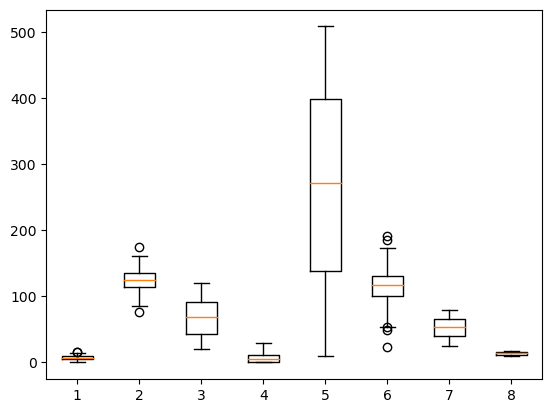

In [18]:
fig = plt.boxplot(Numeric)

#### From boxplot found that there are one outliers in 1st plot, 2 in 2nd plot, around 5 in 6th plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


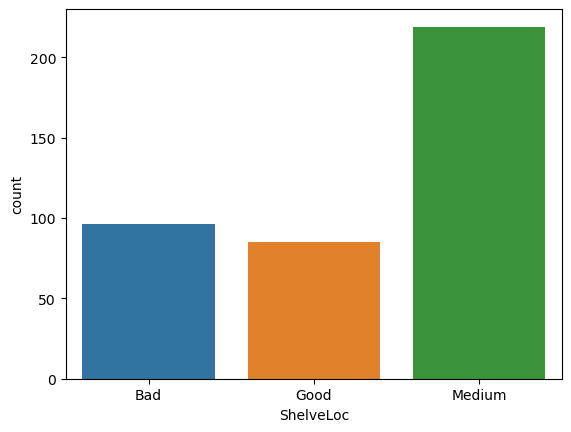

<Figure size 640x480 with 0 Axes>

In [19]:
sns.countplot(df['ShelveLoc'])
plt.show()
plt.tight_layout()

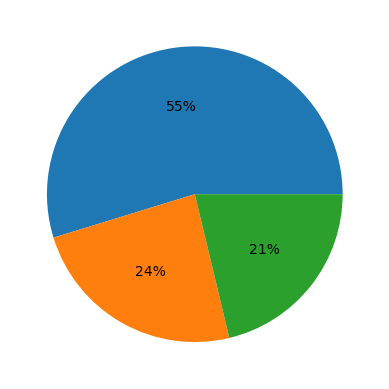

<Figure size 640x480 with 0 Axes>

In [20]:
plt.pie(df['ShelveLoc'].value_counts(), autopct='%.0f%%')
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


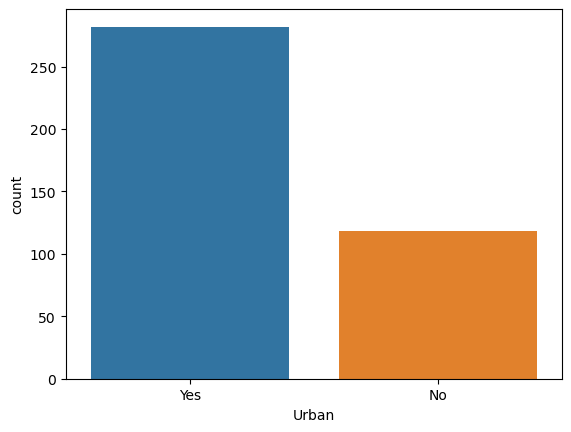

<Figure size 640x480 with 0 Axes>

In [21]:
sns.countplot(df['Urban'])
plt.show()
plt.tight_layout()

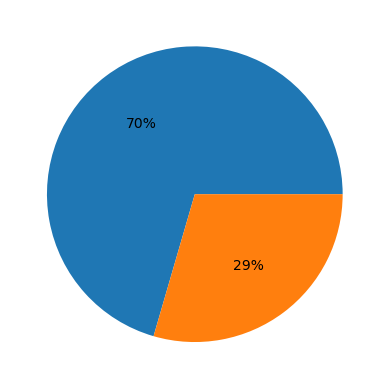

<Figure size 640x480 with 0 Axes>

In [22]:
plt.pie(df['Urban'].value_counts(), autopct='%.0f%%')
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


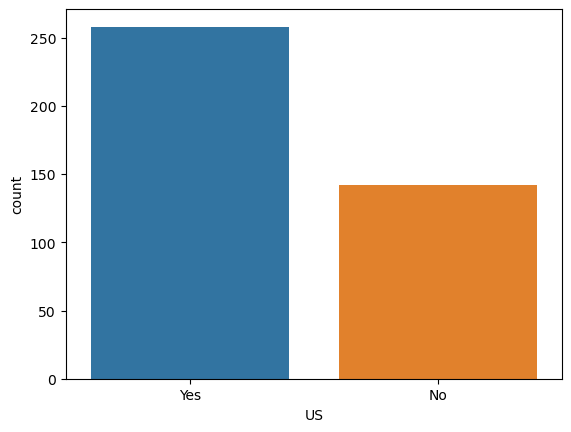

<Figure size 640x480 with 0 Axes>

In [23]:
sns.countplot(df['US'])
plt.show()
plt.tight_layout()

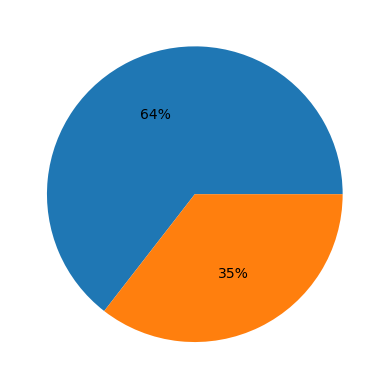

<Figure size 640x480 with 0 Axes>

In [24]:
plt.pie(df['US'].value_counts(), autopct='%.0f%%')
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


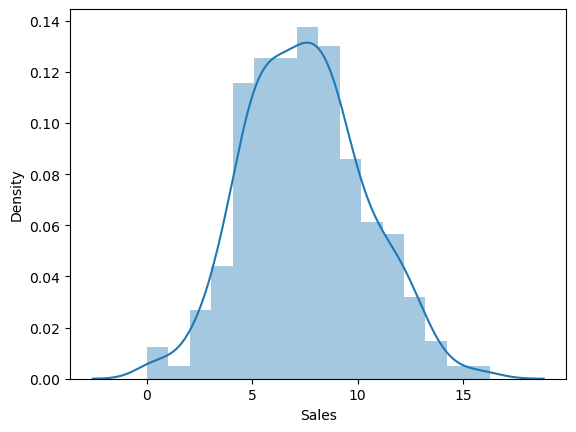

<Figure size 640x480 with 0 Axes>

In [25]:
sns.distplot(df['Sales'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


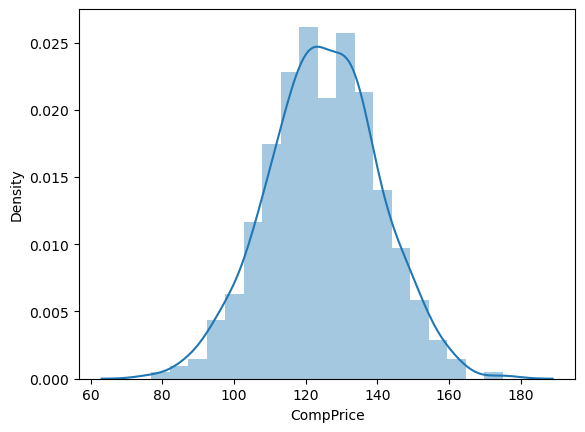

<Figure size 640x480 with 0 Axes>

In [26]:
sns.distplot(df['CompPrice'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


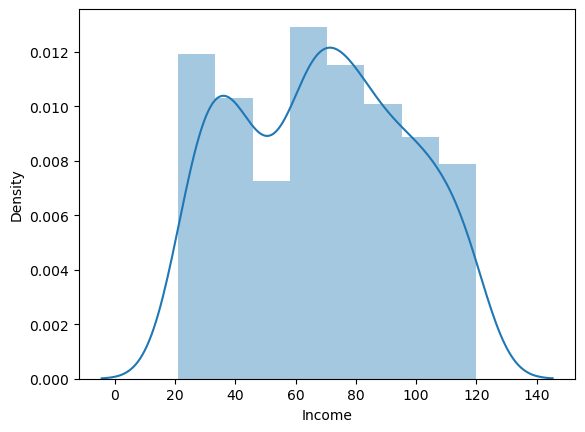

<Figure size 640x480 with 0 Axes>

In [27]:
sns.distplot(df['Income'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


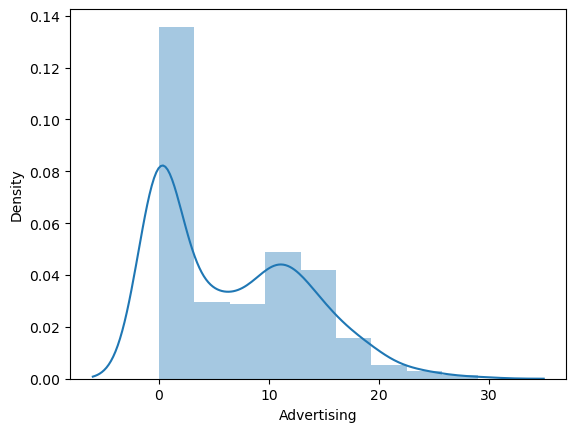

<Figure size 640x480 with 0 Axes>

In [28]:
sns.distplot(df['Advertising'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


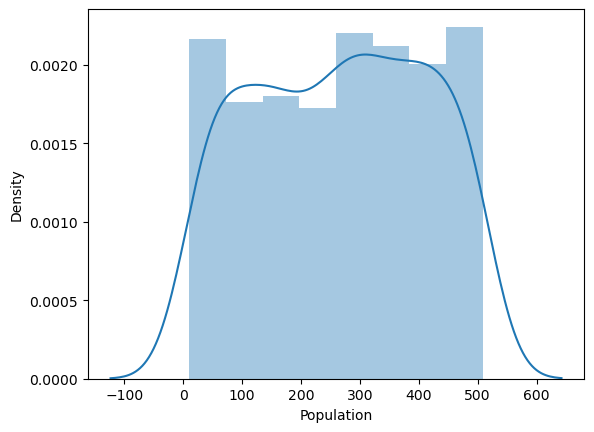

<Figure size 640x480 with 0 Axes>

In [29]:
sns.distplot(df['Population'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


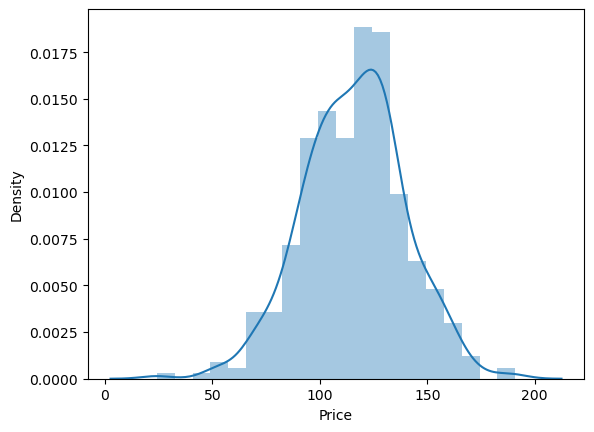

<Figure size 640x480 with 0 Axes>

In [30]:
sns.distplot(df['Price'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


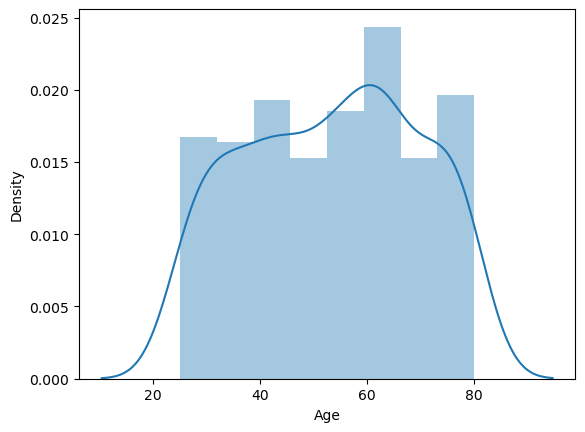

<Figure size 640x480 with 0 Axes>

In [31]:
sns.distplot(df['Age'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


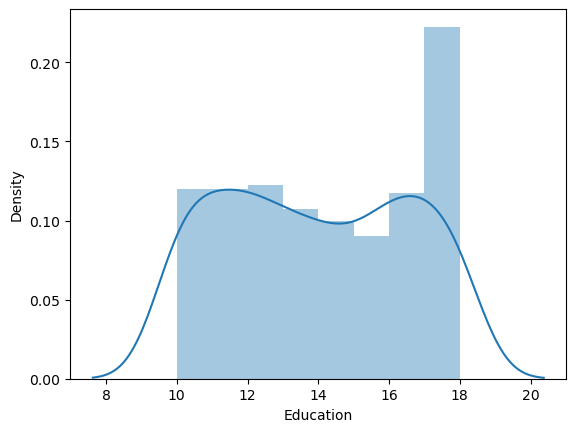

<Figure size 640x480 with 0 Axes>

In [32]:
sns.distplot(df['Education'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


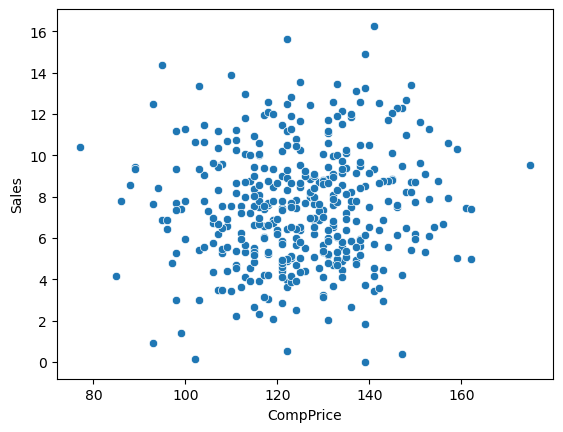

<Figure size 640x480 with 0 Axes>

In [33]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('CompPrice','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


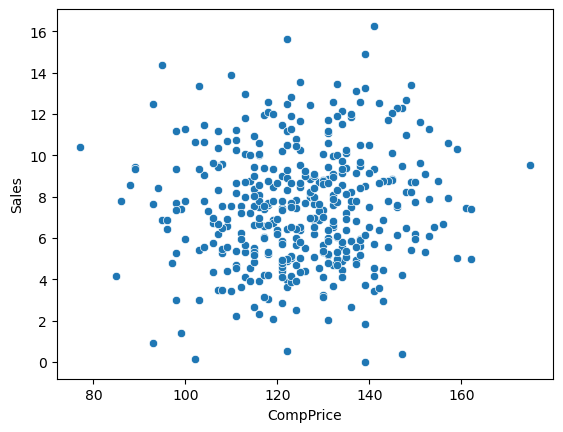

<Figure size 640x480 with 0 Axes>

In [34]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('CompPrice','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


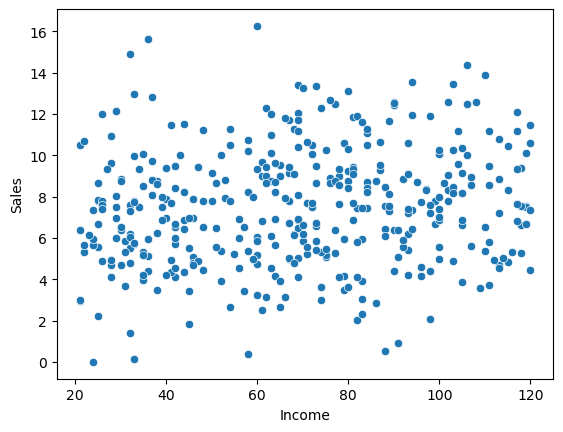

<Figure size 640x480 with 0 Axes>

In [35]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('Income','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


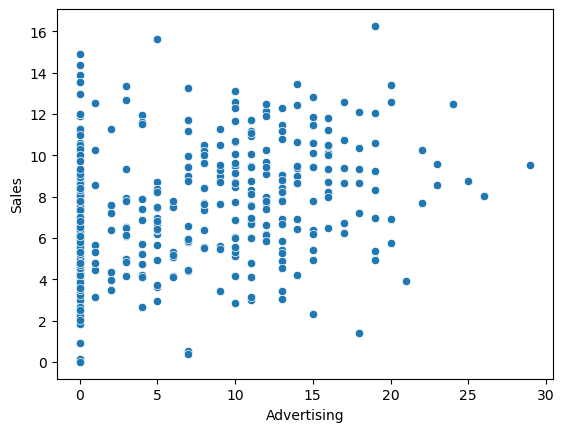

<Figure size 640x480 with 0 Axes>

In [36]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('Advertising','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


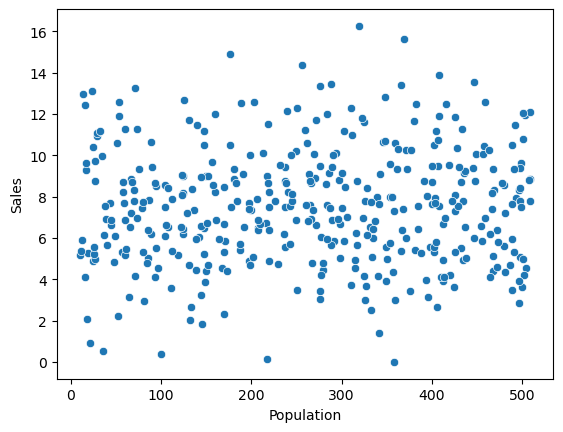

<Figure size 640x480 with 0 Axes>

In [37]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('Population','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


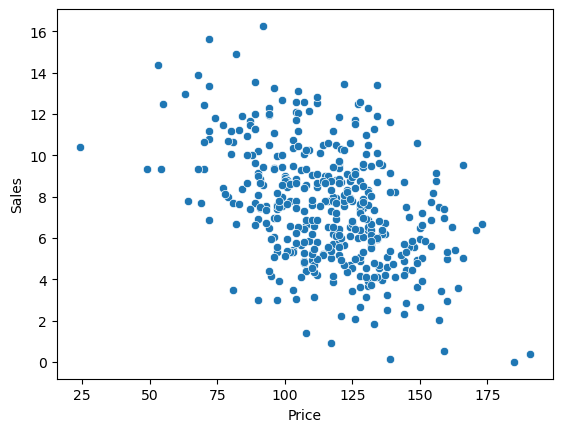

<Figure size 640x480 with 0 Axes>

In [38]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('Price','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


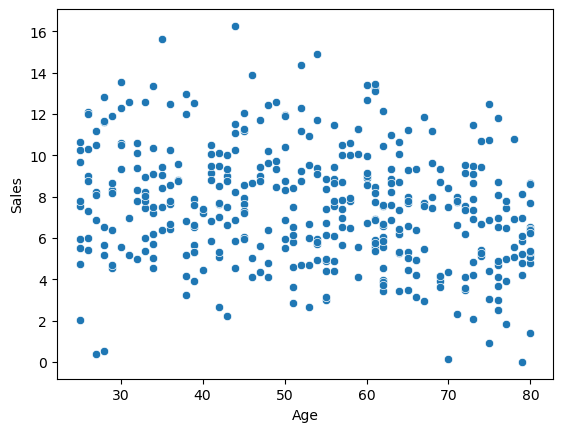

<Figure size 640x480 with 0 Axes>

In [39]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('Age','Sales',data=df)
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


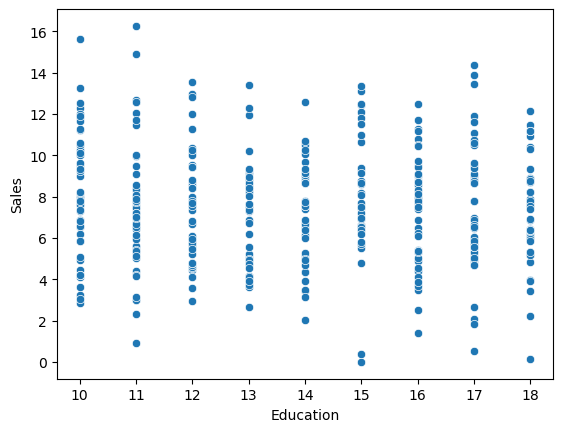

<Figure size 640x480 with 0 Axes>

In [40]:
# plotting a scatter plot to find the relation between target variable(Sales) and other variables
sns.scatterplot('Education','Sales',data=df)
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='Urban', ylabel='ShelveLoc'>

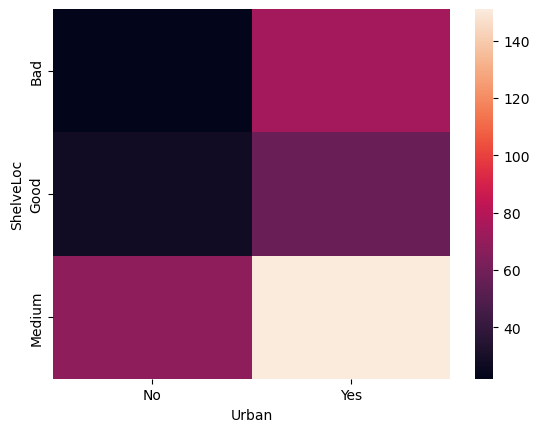

In [41]:
sns.heatmap(pd.crosstab(df['ShelveLoc'], df['Urban']))

<AxesSubplot:xlabel='US', ylabel='ShelveLoc'>

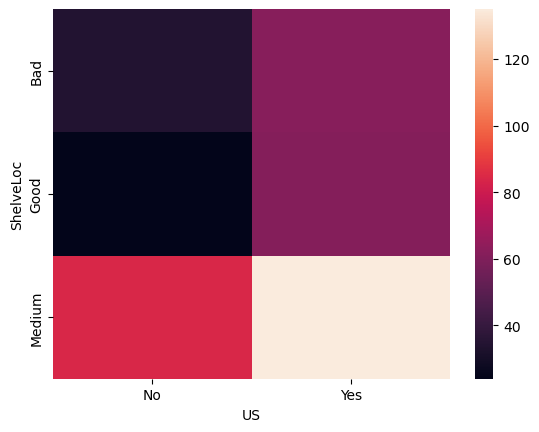

In [42]:
sns.heatmap(pd.crosstab(df['ShelveLoc'], df['US']))

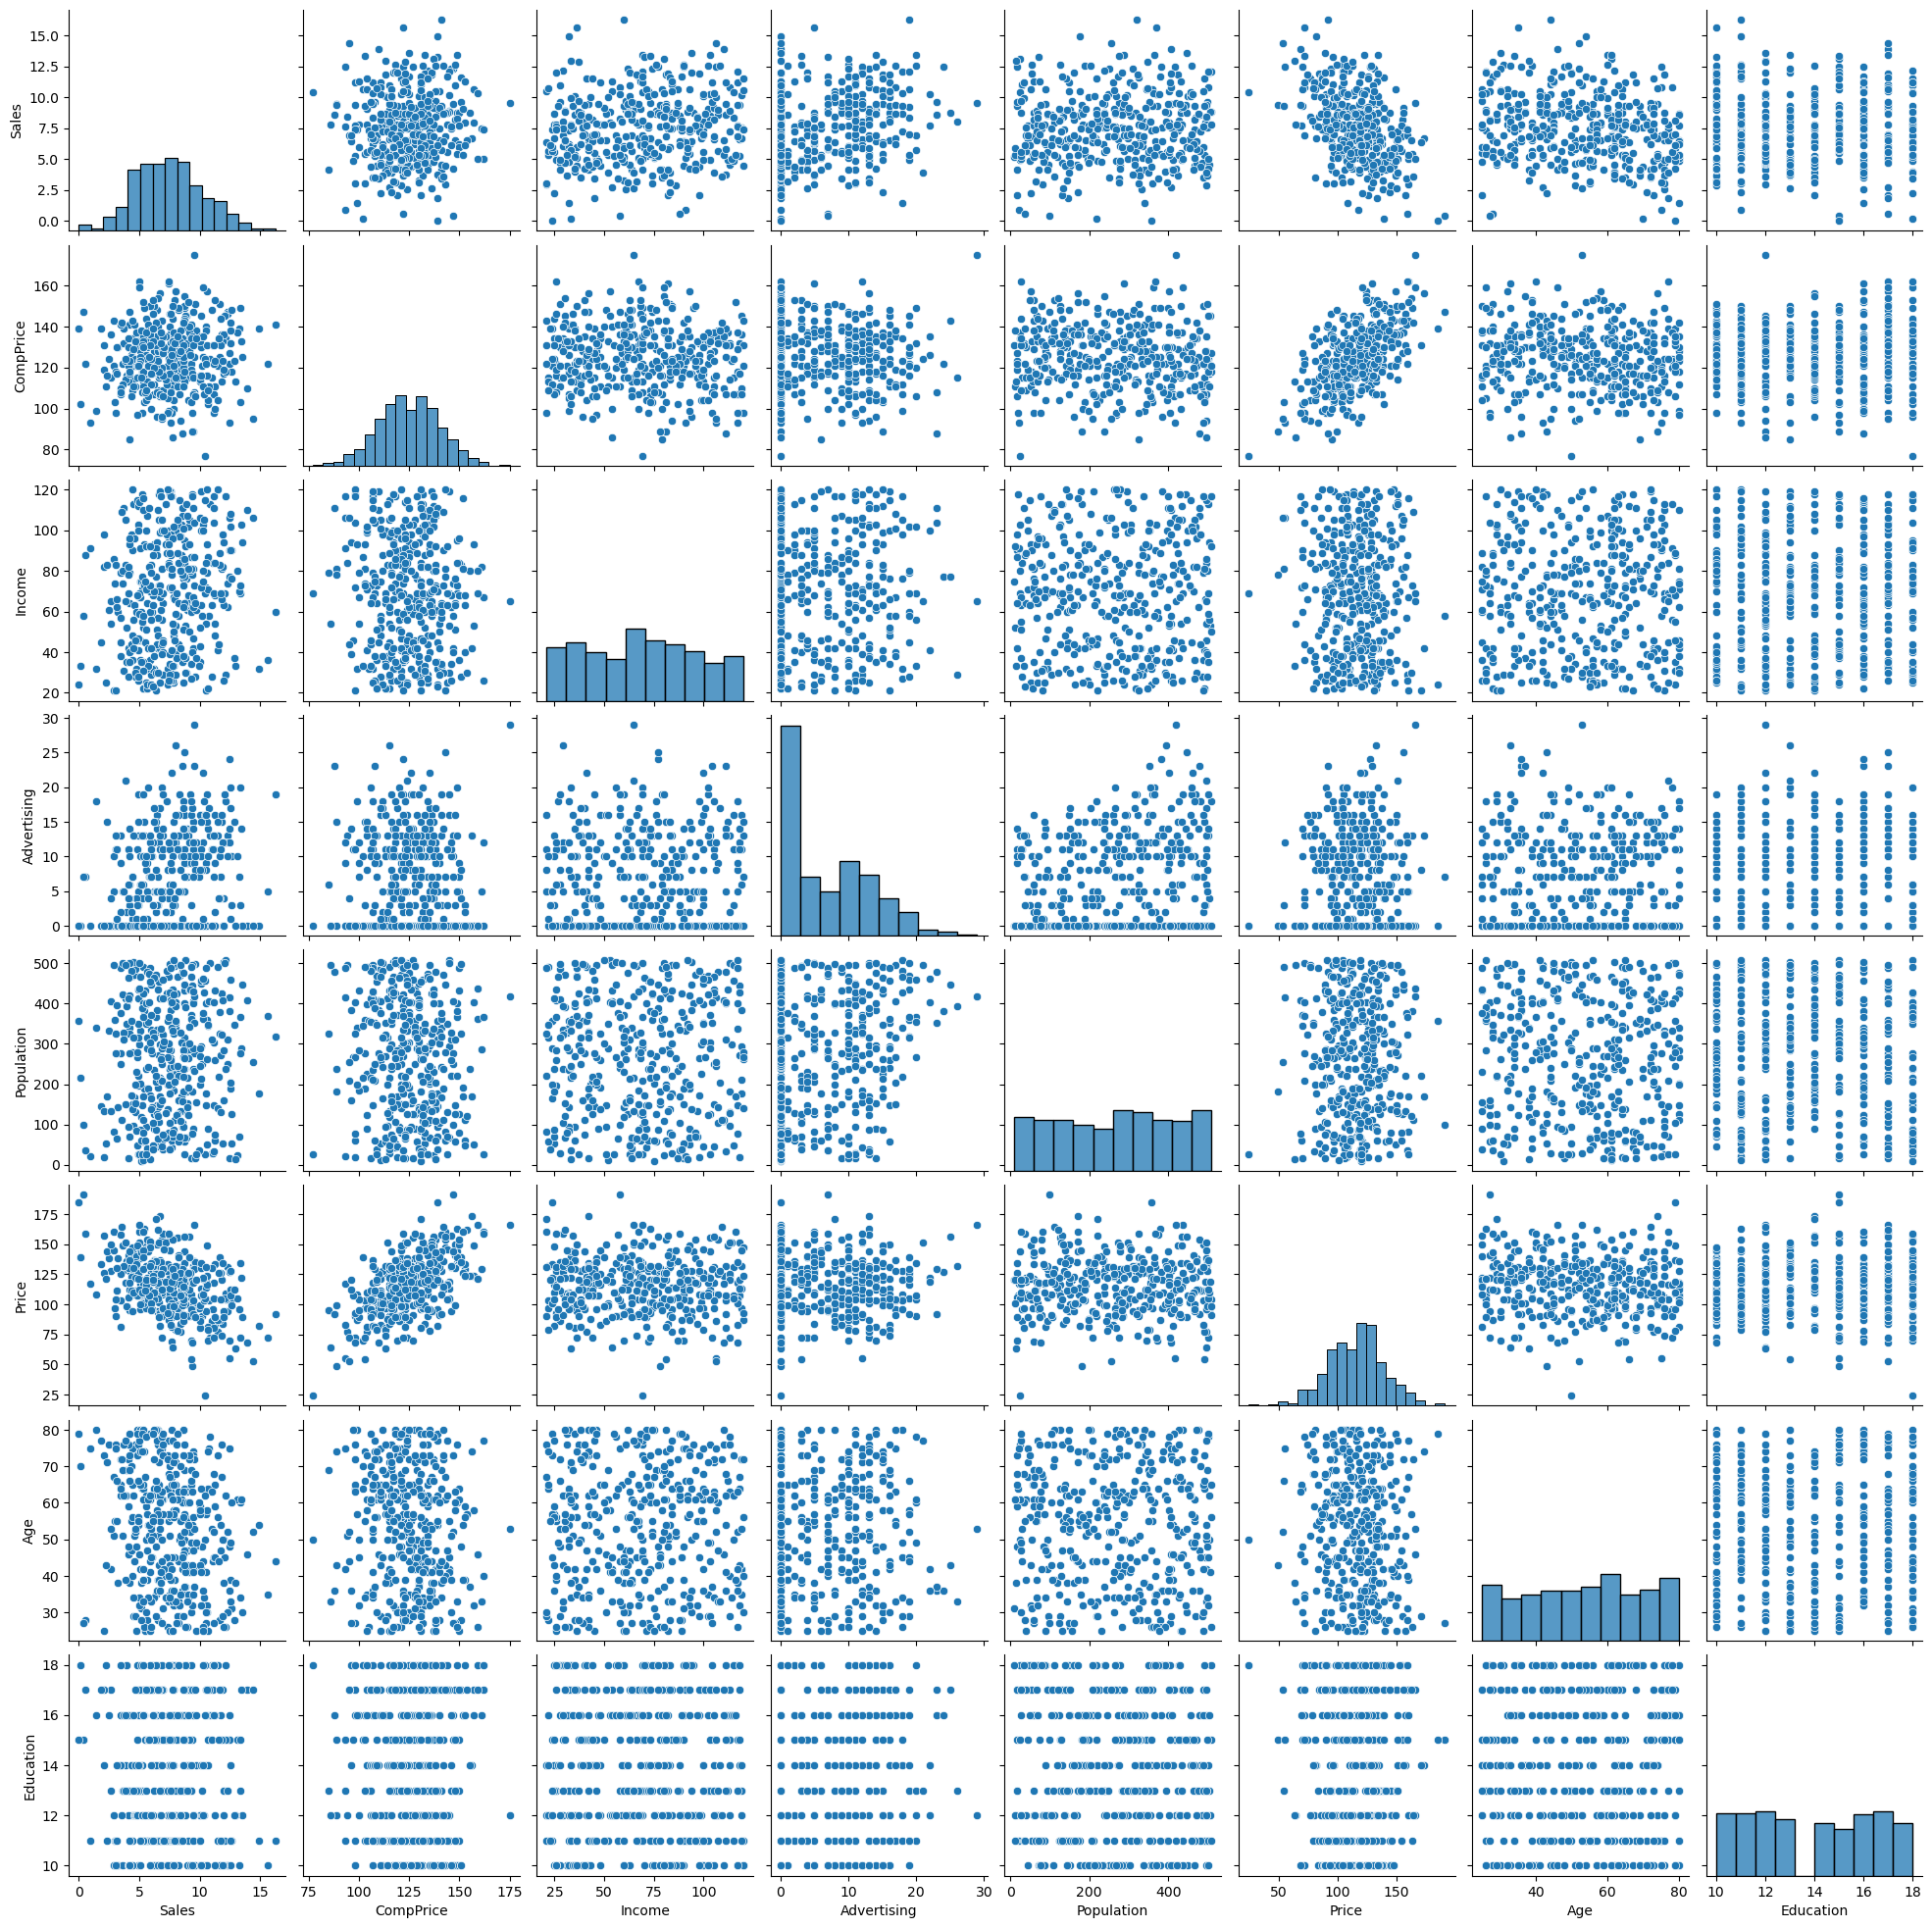

In [43]:
sns.pairplot(df)

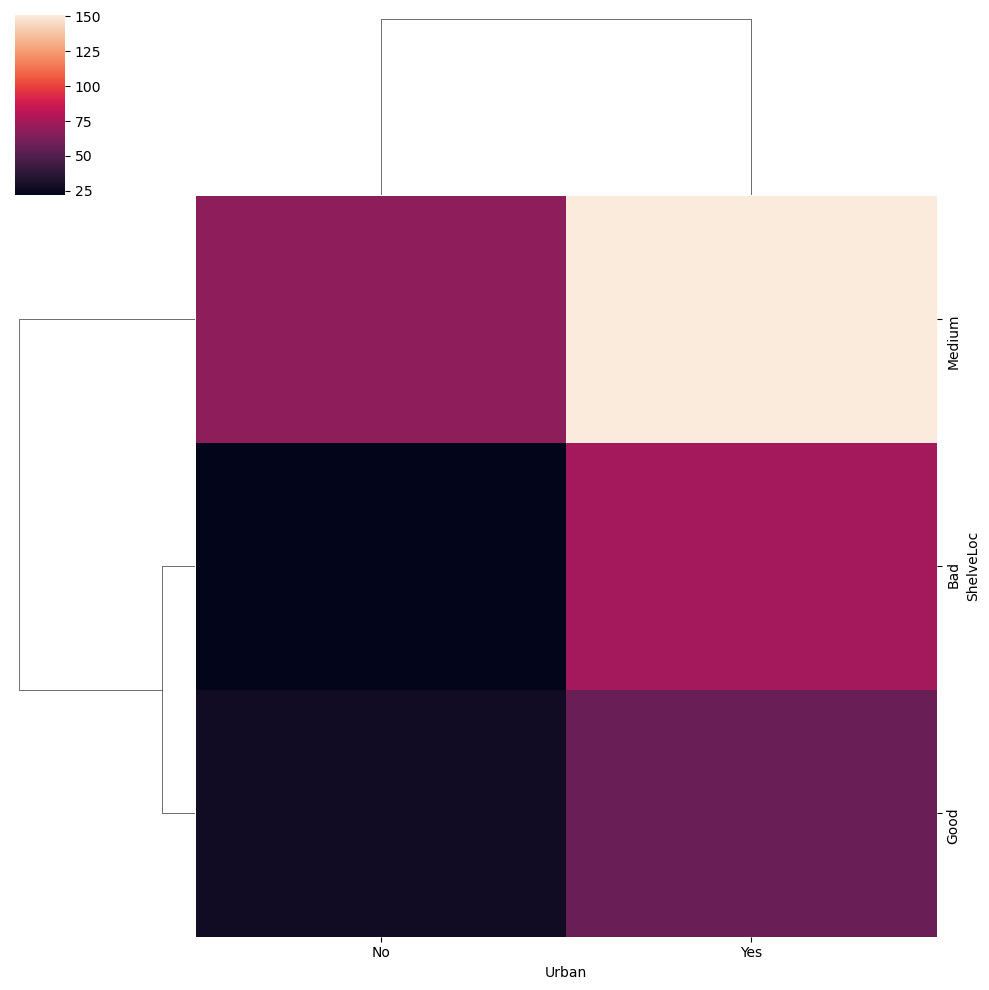

In [44]:
sns.clustermap(pd.crosstab(df['ShelveLoc'], df['Urban']))

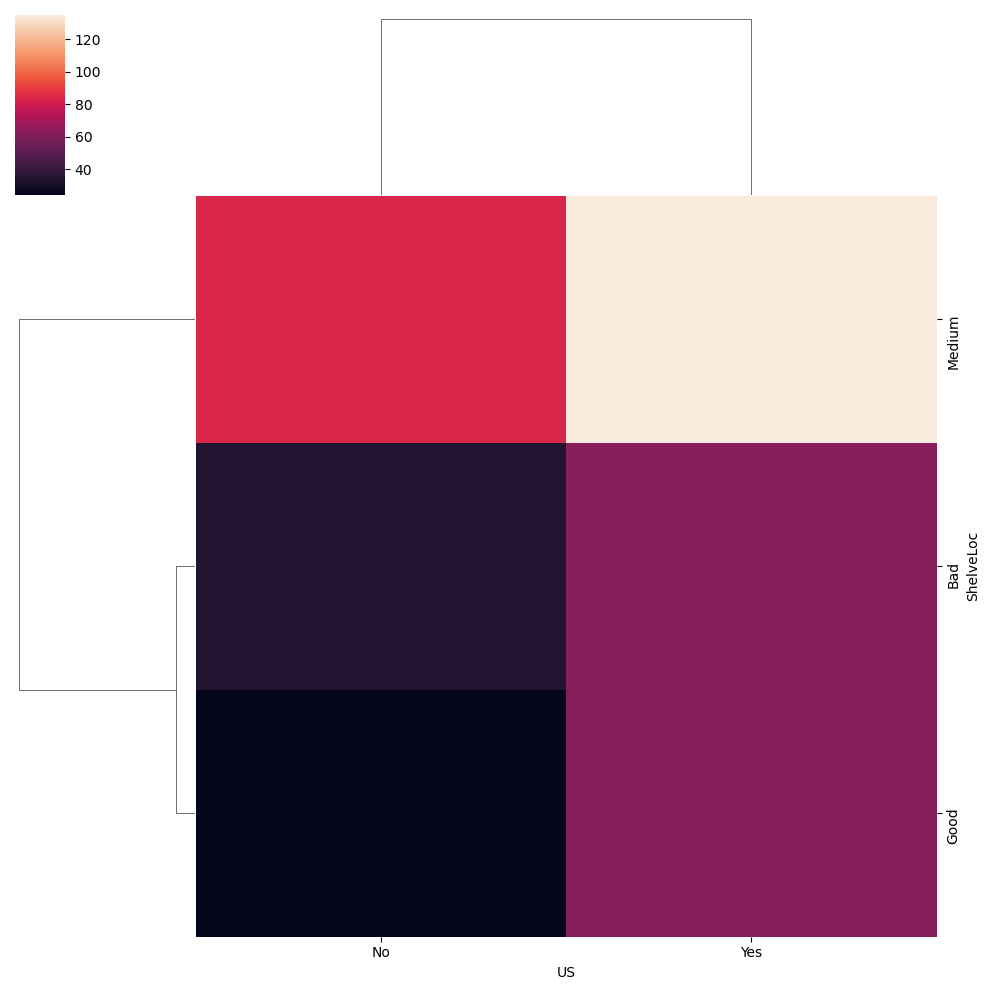

In [45]:
sns.clustermap(pd.crosstab(df['ShelveLoc'], df['US']))

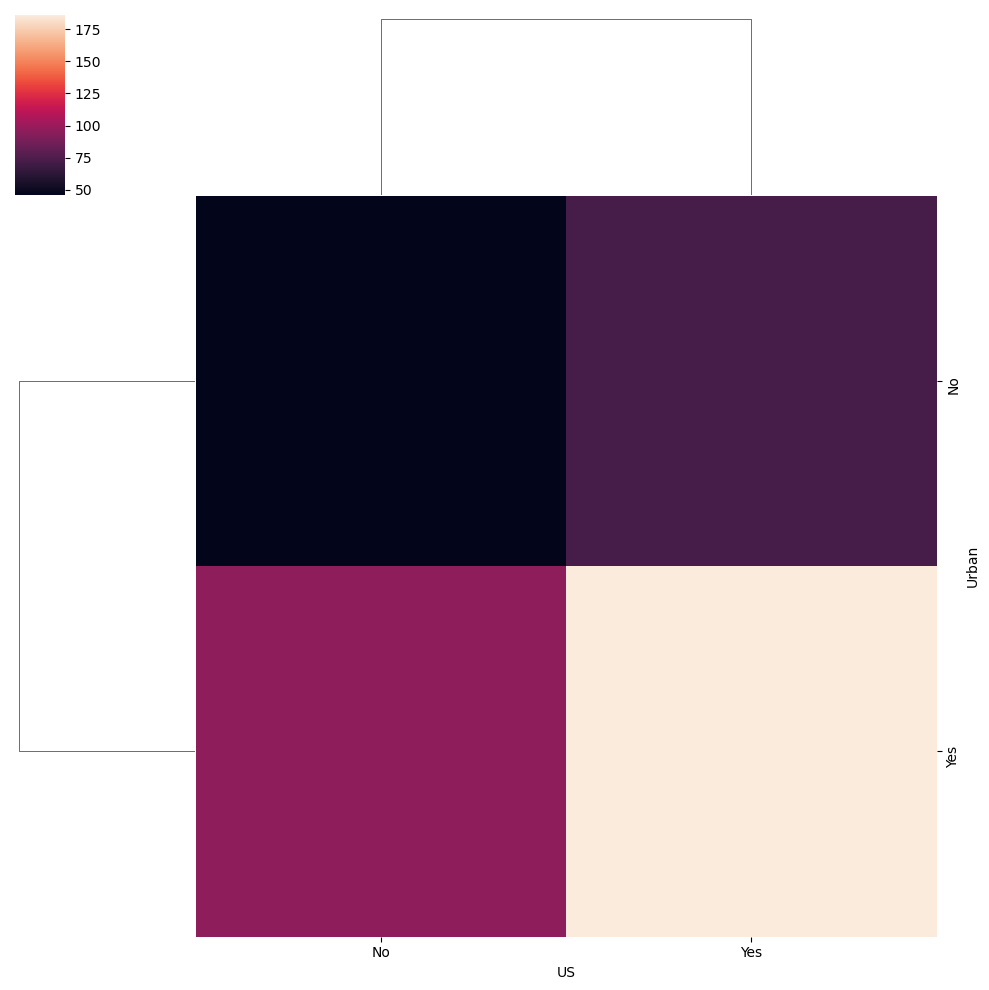

In [46]:
sns.clustermap(pd.crosstab(df['Urban'], df['US']))

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
OHE = OneHotEncoder(sparse='False', drop='first')

In [49]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [50]:
# Checking for missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:>

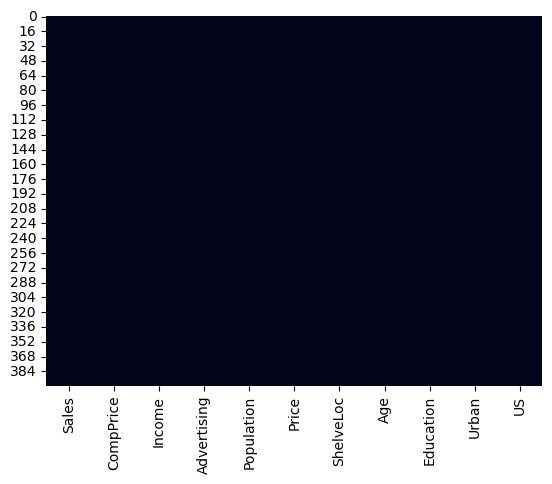

In [51]:
#plotting missing values
sns.heatmap(df.isnull(), cbar=False)

In [52]:
df.shape

(400, 11)

In [53]:
df1 = pd.get_dummies(df, drop_first=True)

In [54]:
df1.shape

(400, 12)

In [55]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [56]:
def sales_val(value):
    if value <= 7.5:
        return ('Low')
    else:
        return ('High')
df1['sales_val'] = df1['Sales'].apply(sales_val)

In [57]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_val
0,9.50,138,73,11,276,120,42,17,0,0,1,1,High
1,11.22,111,48,16,260,83,65,10,1,0,1,1,High
2,10.06,113,35,10,269,80,59,12,0,1,1,1,High
3,7.40,117,100,4,466,97,55,14,0,1,1,1,Low
4,4.15,141,64,3,340,128,38,13,0,0,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,High
396,6.14,139,23,3,37,120,55,11,0,1,0,1,Low
397,7.41,162,26,12,368,159,40,18,0,1,1,1,Low
398,5.94,100,79,7,284,95,50,12,0,0,1,1,Low


In [58]:
df1['sales_val'].value_counts()

Low     202
High    198
Name: sales_val, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_val', ylabel='count'>

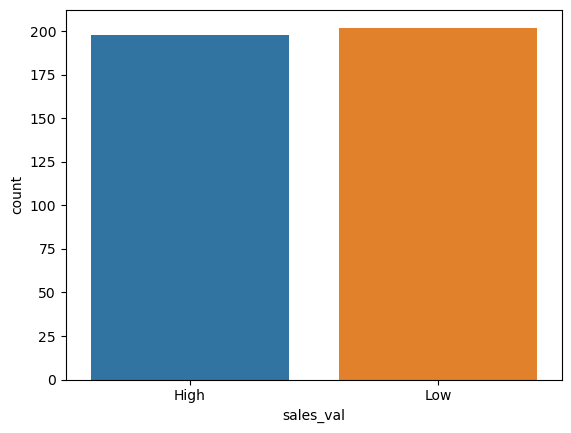

In [59]:
sns.countplot(df1['sales_val'])

In [60]:
df1.drop(columns=['Sales'], inplace=True)

In [61]:
X = df1.drop(columns=['sales_val'])
y = df1.sales_val

In [62]:
y = pd.get_dummies(y, drop_first=True)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaled = StandardScaler()

In [65]:
X_scaled = scaled.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=20)

In [68]:
len(X_train)

320

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model = RandomForestClassifier()

In [71]:
model.fit(X_train, y_train)

/var/folders/09/9skqbfw93w33bh0d34nbxb240000gn/T/ipykernel_8477/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [72]:
pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, pred)

array([[34,  7],
       [ 4, 35]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


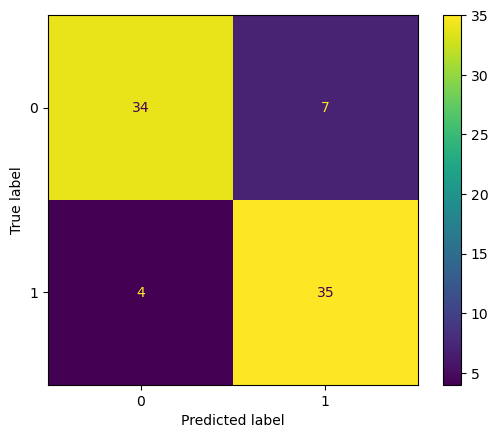

In [75]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.83      0.90      0.86        39

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



In [78]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [79]:
mean_squared_error(y_test,pred)

0.1375

In [80]:
accuracy_score(y_test,pred)*100

86.25